In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from glob import glob
import numpy as np
from sklearn.pipeline import make_pipeline


NAN = float('nan')
INPUT_PATH = "data/2/{}_2014-2017.csv"
OUTPUT_FEATURES_PATH = "data/models/features/{}.csv"
OUTPUT_TARGET_PATH = "data/models/target/{}.csv"


/home/jessica/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Combined

In [3]:
df_RB = pd.read_csv(INPUT_PATH.format("RB"))[['fp', 'next_fp']]
df_WR = pd.read_csv(INPUT_PATH.format("WR"))[['fp', 'next_fp']]
df_all = pd.concat([df_RB, df_WR])

In [4]:
for df in [df_RB, df_WR, df_all]:
    print(df.next_fp.mean(), df.next_fp.median())
    df['mean_err'] = np.absolute(df['next_fp'] - df.next_fp.mean())
    df['median_err'] = np.absolute(df['next_fp'] - df.next_fp.median())
    df['fp_err'] = np.absolute(df['next_fp'] - df['fp'])
    print(df.head())

10.403977450673331 8.6
     fp  next_fp  mean_err  median_err  fp_err
0  10.9     19.4  8.996023        10.8     8.5
1  19.4      4.2  6.203977         4.4    15.2
2   4.2     19.8  9.396023        11.2    15.6
3   3.1      5.1  5.303977         3.5     2.0
4  19.8      8.0  2.403977         0.6    11.8
10.943360864040661 9.7
     fp  next_fp  mean_err  median_err  fp_err
0  19.6     10.2  0.743361         0.5     9.4
1  10.2     14.1  3.156639         4.4     3.9
2  14.1     10.1  0.843361         0.4     4.0
3  13.0     18.0  7.056639         8.3     5.0
4  10.1     18.7  7.756639         9.0     8.6
10.671755243652452 9.2
     fp  next_fp  mean_err  median_err  fp_err
0  10.9     19.4  8.728245        10.2     8.5
1  19.4      4.2  6.471755         5.0    15.2
2   4.2     19.8  9.128245        10.6    15.6
3   3.1      5.1  5.571755         4.1     2.0
4  19.8      8.0  2.671755         1.2    11.8


### Plot

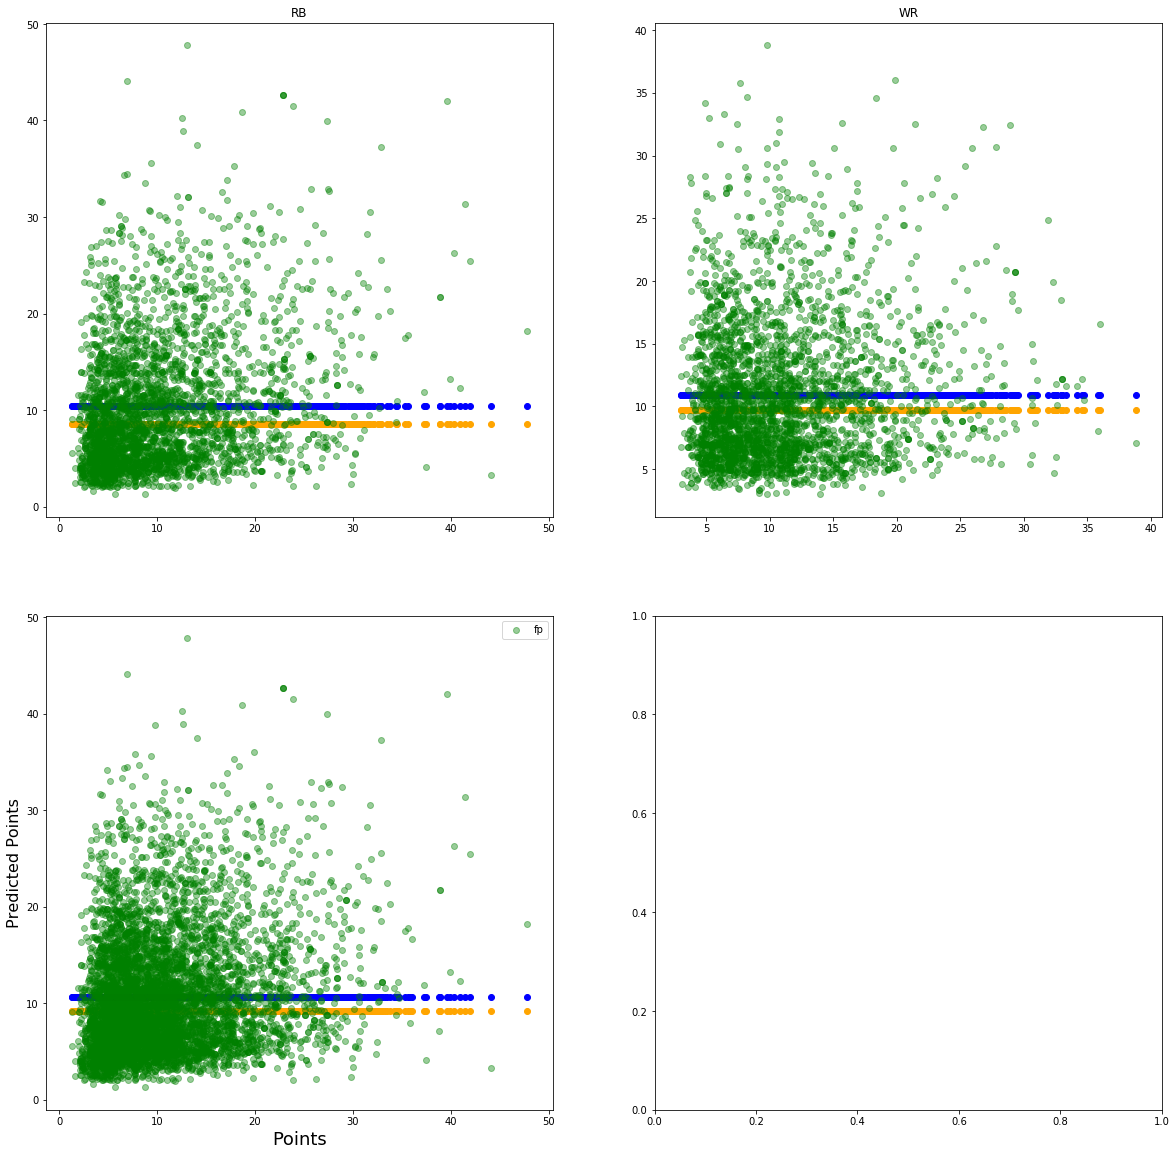

In [5]:

#plt.figure(figsize=[20, 20])
fig, ax = plt.subplots(2, 2, figsize=[20, 20])
#plt.hlines(y=[df.fp.median(), df.fp.mean()], xmin=0, xmax=len(df)+1, color=['b', 'g'])
#plt.plot(range(1, len(df)+1), df.next_fp, color='r', alpha=0.7)
#plt.plot(range(1, len(df)+1), df.fp, color='orange', alpha=0.3)
plt.subplot(2, 2, 1)
plt.title("RB")
plt.scatter(df_RB['next_fp'], [df_RB.next_fp.mean()] * len(df_RB), color='b')
plt.scatter(df_RB['next_fp'], [df_RB.next_fp.median()] * len(df_RB), color='orange')
plt.scatter(df_RB['next_fp'], df_RB['fp'], color='g', alpha=0.4)

plt.subplot(2, 2, 2)
plt.title("WR")
plt.scatter(df_WR['next_fp'], [df_WR.next_fp.mean()] * len(df_WR), color='b')
plt.scatter(df_WR['next_fp'], [df_WR.next_fp.median()] * len(df_WR), color='orange')
plt.scatter(df_WR['next_fp'], df_WR['fp'], color='g', alpha=0.4)

plt.subplot(2, 2, 3)
#plt.title("COMBINED")
plt.scatter(df_all['next_fp'], [df_all.next_fp.mean()] * len(df_all), color='b')
plt.scatter(df_all['next_fp'], [df_all.next_fp.median()] * len(df_all), color='orange')
plt.scatter(df_all['next_fp'], df_all['fp'], color='g', alpha=0.4)

plt.xlabel('Points', fontsize=18)
plt.ylabel('Predicted Points', fontsize=16)
plt.legend()

### Plot residual

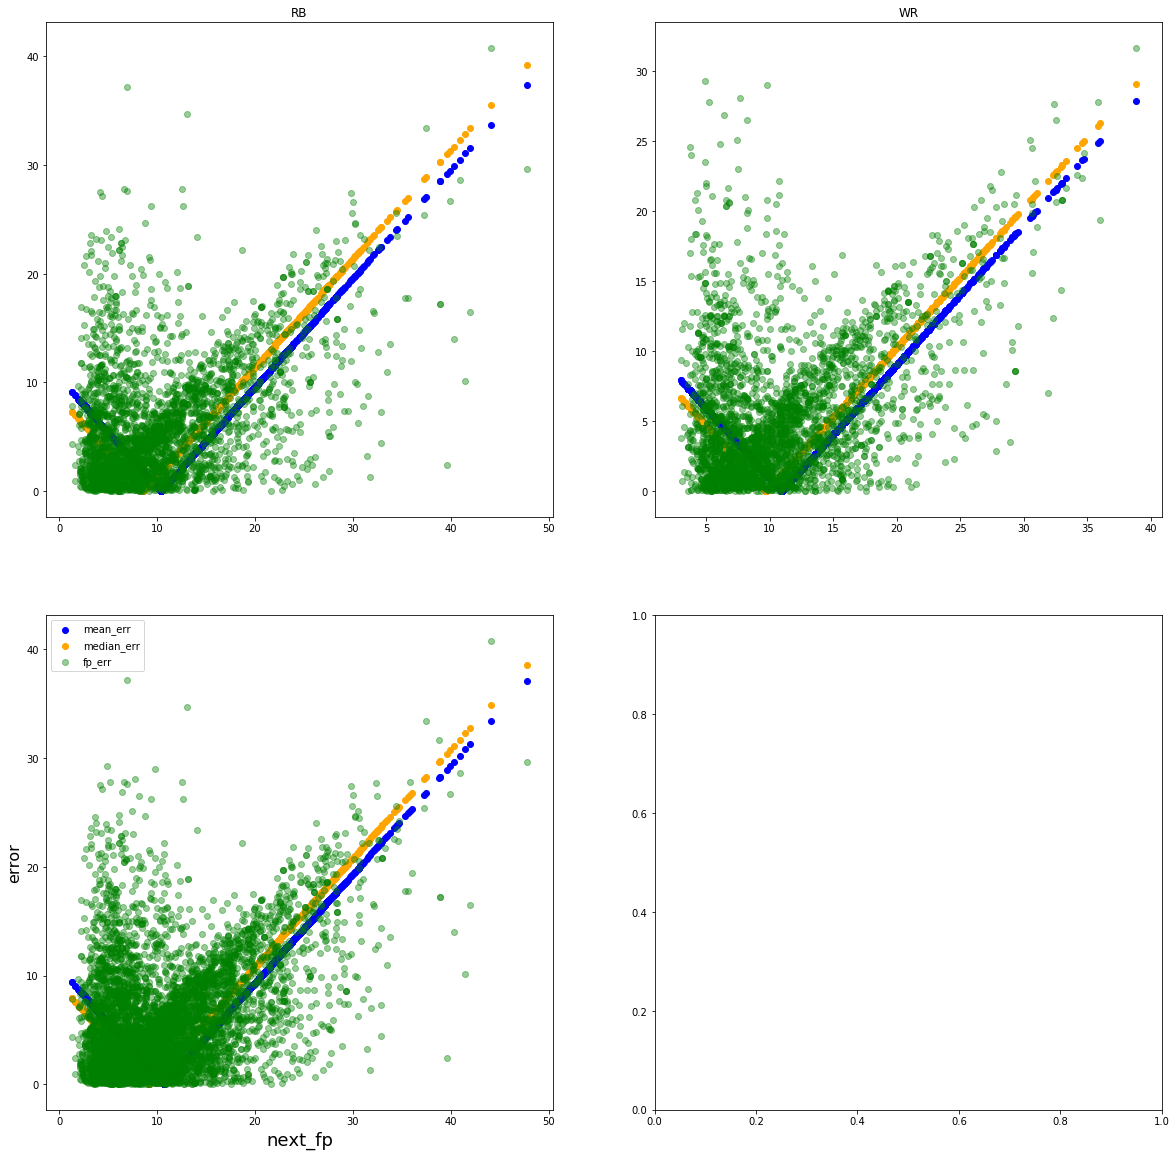

In [6]:

#plt.figure(figsize=[20, 20])
fig, ax = plt.subplots(2, 2, figsize=[20, 20])
#plt.hlines(y=[df.fp.median(), df.fp.mean()], xmin=0, xmax=len(df)+1, color=['b', 'g'])
#plt.plot(range(1, len(df)+1), df.next_fp, color='r', alpha=0.7)
#plt.plot(range(1, len(df)+1), df.fp, color='orange', alpha=0.3)
plt.subplot(2, 2, 1)
plt.title("RB")
plt.scatter(df_RB['next_fp'], df_RB['mean_err'], color='b')
plt.scatter(df_RB['next_fp'], df_RB['median_err'], color='orange')
plt.scatter(df_RB['next_fp'], df_RB['fp_err'], color='g', alpha=0.4)

plt.subplot(2, 2, 2)
plt.title("WR")
plt.scatter(df_WR['next_fp'], df_WR['mean_err'], color='b')
plt.scatter(df_WR['next_fp'], df_WR['median_err'], color='orange')
plt.scatter(df_WR['next_fp'], df_WR['fp_err'], color='g', alpha=0.4)

plt.subplot(2, 2, 3)
#plt.title("COMBINED")
plt.scatter(df_all['next_fp'], df_all['mean_err'], color='b')
plt.scatter(df_all['next_fp'], df_all['median_err'], color='orange')
plt.scatter(df_all['next_fp'], df_all['fp_err'], color='g', alpha=0.4)

plt.xlabel('next_fp', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.legend()

Errors should be as close to 0 as possible, but it looks like they increase for larger next_fp.

In [7]:
# Print scores for baselines
def print_scores(df):
    X_mean = [df.next_fp.mean()]*len(df.next_fp)  # Mean as baseline
    X_median = [df.next_fp.median()]*len(df.next_fp)  # Median as baseline
    X_fp = list(df['fp'])  # Previous score as baseline
    y = df.next_fp

    reg = LinearRegression()
    res_cv = {}
    res_train = {}
    for model, X in zip(['mean', 'median', 'fp'], [X_mean, X_median, X_fp]):
        X = np.reshape(X, (-1, 1))
    
        # transforms the data to polynomials
        reg.fit(X, y)

        # calculates the MSE for CV
        scores = cross_val_score(reg, X, y, cv=3, scoring='neg_mean_squared_error') # cross val
        res_cv[model] = np.mean(-scores)
    
        # calculates the MSE for Training Set
        reg.fit(X,y)
        y_pred = reg.predict(X)
        res_train[model] = np.sum((y_pred-y)**2)/len(y)
        print(model, res_train[model], res_cv[model])
        
for df in [df_RB, df_WR, df_all]:
    print_scores(df)

mean 44.28594409219431 44.31178841181765
median 44.28594409219431 44.31178841181765
fp 41.40831024905902 41.416737419732726
mean 30.782926061644996 30.97242391014502
median 30.782926061644996 30.97242391014502
fp 30.506423971893234 30.71886546271361
mean 37.65507827852676 37.73475092440446
median 37.65507827852676 37.73475092440445
fp 36.267717119413675 36.54135722178276


## Results of baselines:
## RB only
    mean 44.28594409219431 44.31178841181765
    median 44.28594409219431 44.31178841181765
    fp 41.40831024905902 41.416737419732726
## WR only
    mean 30.782926061644996 30.97242391014502
    median 30.782926061644996 30.97242391014502
    fp 30.506423971893234 30.71886546271361
## Combined
    mean 37.65507827852676 37.73475092440446
    median 37.65507827852676 37.73475092440445
    fp 36.267717119413675 36.54135722178276
